## Page Rank

This algorithm was developed by Larry Page and Sergey Brin, based on Eigen conceptions. PageRank generate a ranked list of web pages. It is based on connections between pages. PageRank analisys link and assigns it a numerical weigth to each element of hyperlinked set of documents, for example WWW. 
The algorithm is based on an idealrandom web surfer, who, when reaching a page, goes to next page by clicking any link on the page. When goes to website without links, surfer has equal probability of moving to any other page by typing URL.The design principle of PageRank is that important websites will be linked to by important websites.


![title](image/PageRanks_Example.png)

https://en.wikipedia.org/wiki/PageRank#/media/File:PageRanks-Example.jpg

More info and helpful formula: https://en.wikipedia.org/wiki/PageRank

PageRank is used by Google.

Main concepts:
    1. Eigenvectors - this is vectors, that have the same range befor and after transformation => T(v) = lamb * v
    2. Eigenvalue - the amount by which each of these vector will be extended, for example
    3. Eigenbasis - is a basis in which every vector is an eigenvector

In [2]:
# imports
import numpy as np
import numpy.linalg as la

In [3]:
def page_rank(linkMatrix, d) :
    n = linkMatrix.shape[0]
    M = d * linkMatrix + (1-d)/n * np.ones([n, n])
    r = 100 * np.ones(n) / n
    lastR = r
    r = linkMatrix @ r
    i = 0
    while la.norm(lastR - r) > 0.01 :
        lastR = r
        r = M @ r
        i += 1
    return r

In [4]:
internet_matrix = np.array([[0., 0.2, 0.2, 0.,  0.2],
                            [0., 0.2, 0.2, 0.,  0.2],
                            [0., 0.2, 0.2, 0.,  0.2],
                            [0., 0.2, 0.2, 0.5, 0.2],
                            [1., 0.2, 0.2, 0.5, 0.2]])

In [5]:
page_rank(internet_matrix, 1)

array([12.5009852, 12.5009852, 12.5009852, 24.9976562, 37.4993882])

In [13]:
# count eigenvectors and eigenvalues
eigenvalue, eigenvector = la.eig(internet_matrix) 
sort = np.absolute(eigenvalue).argsort()[::-1] 
eigenvalue = eigenvalue[sort]
eigenvector = eigenvector[:,sort]

d = eigenvector[:, 0]
100 * (d / np.sum(d))

array([12.5, 12.5, 12.5, 25. , 37.5])

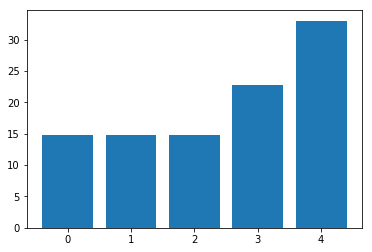

In [10]:
import matplotlib.pyplot as plt

pr = page_rank(internet_matrix, 0.7)
plt.bar(np.arange(pr.shape[0]), pr);